# Obesity and Mode of Transport to Work.

The aim of this study was to a realtion between various modes of transport to work and obesity.

Based on the study conducted by Li Ming Wen and Chris Rissel on

Inverse associations between cycling to work, public transport, and overweight and obesity: Findings from a population based study in Australia
link : https://www.sciencedirect.com/science/article/abs/pii/S0091743507003714
Health Promotion Service, Sydney South West Area Health Service, Level 9, King George V Building, Missenden Road, Camperdown, NSW 2050, Australia

1.Population using public transport to work were significatly less likely to be overweight and obese.

2.It is clearly visibly that there is a moderate negative correlation between the use if public transport and the obesity rate.

3.It is clearly visibly that there is a strong positive correlation between the use of personal vehicle and the obesity rate.

In [1]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
import numpy as np
import scipy.stats as st


In [2]:
# path to state name csv
path1 = "Project_data/state-abbrevs.csv"
# path to commute data
path2 = "Project_data/commute_data.csv" 

In [3]:
# Loading state name csv
df1 = pd.read_csv(path1)

# Loading commute csv
path3 = "Project_data/commute_data.csv" 
commute_df = pd.read_csv(path2)

# getting the list diffrent mode of commute 
commute_mode = commute_df["Mode"].unique().tolist()

# dropping two states
df = commute_df.loc[commute_df['State'] != 'Puerto Rico']
df1 = df.loc[df['State'] != 'District of Columbia']

# data frame of diffrent mode of commute 
df_list = []

# for loop to get data frame corresponding to each mode of commute

for mode in commute_mode:
    mode_value = df1.loc[df1['Mode'] == mode].reset_index(drop=True)
    rename_mode = mode_value.rename(columns={'Commute mode share (percent)': mode})
    del rename_mode['Mode']
    df_list.append(rename_mode)

# merging all the data frame from the list of data frame

df_list1 = reduce(lambda x, y: pd.merge(x, y, on = 'State'), df_list)

df_list1.head()

,State,Bicycle,Walked,"Taxi, motorcycle, or other",Public transportation,Worked at home,Carpool,Drove alone
0,Alabama,0.14%,1.23%,0.98%,0.42%,3.39%,8.67%,85.17%
1,Alaska,0.66%,7.07%,5.01%,0.96%,4.33%,12.00%,69.96%
2,Arizona,0.77%,1.91%,1.78%,1.68%,7.58%,10.65%,75.64%
3,Arkansas,0.15%,1.93%,0.88%,0.40%,3.52%,10.71%,82.41%
4,California,0.86%,2.56%,1.72%,5.18%,6.34%,9.83%,73.51%


In [4]:
# Loading obesetiy csv
path4 = "Project_data/obese_data.csv" 
obese_df = pd.read_csv(path4)

# getting the obeity data
obes_df1 = obese_df[["State","Measure Name","Value"]]
clean_obese = obes_df1.loc[obes_df1["Measure Name"] == "Obesity" ].reset_index(drop=True)
clean_obese[(clean_obese['State'] != 'United States') & (clean_obese['State'] != 'District of Columbia')]

# Merging obesity data with commute data dataframe
final_obesity = clean_obese.merge(df_list1,on = "State")

# dropping measure name column
del final_obesity["Measure Name"]

# renaming the column
clean_obesity_df = final_obesity.rename(columns={"Value":"Percentage Obesity"})
clean_obesity_df.head()

,State,Percentage Obesity,Bicycle,Walked,"Taxi, motorcycle, or other",Public transportation,Worked at home,Carpool,Drove alone
0,Alabama,36.2,0.14%,1.23%,0.98%,0.42%,3.39%,8.67%,85.17%
1,Alaska,29.5,0.66%,7.07%,5.01%,0.96%,4.33%,12.00%,69.96%
2,Arizona,29.5,0.77%,1.91%,1.78%,1.68%,7.58%,10.65%,75.64%
3,Arkansas,37.1,0.15%,1.93%,0.88%,0.40%,3.52%,10.71%,82.41%
4,California,25.8,0.86%,2.56%,1.72%,5.18%,6.34%,9.83%,73.51%


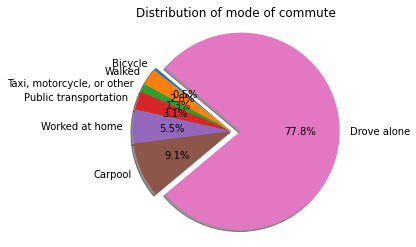

In [5]:
# list of mode of commute
commute_list = list(clean_obesity_df.columns[2:].values)
commute_list
mode_commute = []

# for loop to find the mean of commute data
for commute in commute_list:
    mode_c = clean_obesity_df[commute].str[:-1].astype(float).mean()
    mode_commute.append(mode_c)

# pie chart showing distribution of mode of commute
explode = (0, 0, 0, 0, 0, 0, 0.1)
plt.pie(mode_commute, labels=commute_list, explode= explode,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution of mode of commute")
plt.axis("equal")
plt.savefig("project_image/commutemode.png")
plt.show()


In [6]:
print(f'Average Rate of Obesity in USA : {mean_obesity}')

x_axis = clean_obesity_df["State"]
y_asis = clean_obesity_df["Percentage Obesity"]
plt.figure(figsize=(13,5))
plt.bar(x_axis,y_asis,color="b", align="center")
plt.xlim(-.75, len(x_axis)-0.25)
plt.ylim(0, max(y_asis)+10)
plt.title("State wise Obesity Distribution",fontsize = 15)
plt.xlabel("State",fontsize = 12)
plt.ylabel("Percentage Obesity",fontsize = 12)
plt.xticks(rotation=90)
plt.savefig("project_image/obesitybar.png")
plt.show()
mean_obesity = clean_obesity_df["Percentage Obesity"].mean()


NameError: name 'mean_obesity' is not defined

The correlation coefficient between Obesity and Public transport is -0.43
y = -0.37x + 32.56


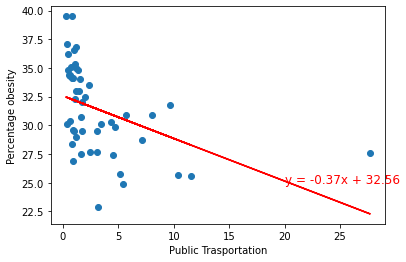

In [7]:
# Scatter Plot obesity vs public transport
x_values = clean_obesity_df["Public transportation"].str[:-1].astype(float)
y_values = clean_obesity_df["Percentage Obesity"]
plt.scatter(x_values,y_values)
plt.xlabel('Public Trasportation')
plt.ylabel('Percentage obesity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression value
regress_values = x_values * slope + intercept

# Calculating Line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



# plotting regression line on scatter plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=12,color="red")


print(f"The correlation coefficient between Obesity and Public transport is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.savefig("project_image/publictransportVSobesity_line.png")
print(line_eq)
plt.show()

In the above scatter plot,it is clearly visibly that there is a moderate negative correlation between the use if public transport and the obesity rate. 

The correlation coefficient between obesity and Drove alone is 0.68
y = 0.47x + -5.45


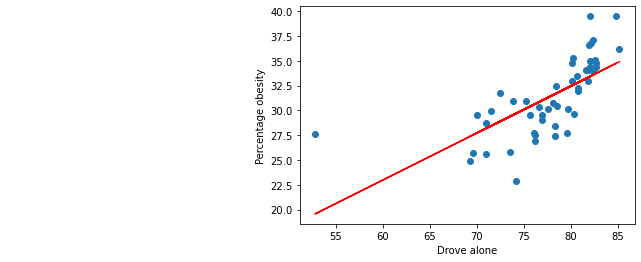

In [8]:
# Scatter Plot obesity VS drove alone
x_values = clean_obesity_df["Drove alone"].str[:-1].astype(float)
y_values = clean_obesity_df["Percentage Obesity"]
plt.scatter(x_values,y_values)
plt.xlabel('Drove alone')
plt.ylabel('Percentage obesity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression value
regress_values = x_values * slope + intercept

# Calculating Line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plotting regression line on scatter plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

print(f"The correlation coefficient between obesity and Drove alone is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.savefig("project_image/dorvealoneVSobesity_line.png")
print(line_eq)
plt.show()

In the above scatter plot,it is clearly visibly that there is a strong positive correlation between the use of personal vehicle and the obesity rate.

The correlation coefficient between obesity and Walked is -0.49
y = -1.55x + 35.7


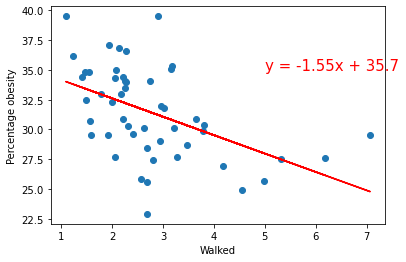

In [9]:
# Scatter Plot obesity VS walked
x_values = clean_obesity_df["Walked"].str[:-1].astype(float)
y_values = clean_obesity_df["Percentage Obesity"]
plt.scatter(x_values,y_values)
plt.xlabel('Walked')
plt.ylabel('Percentage obesity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression value
regress_values = x_values * slope + intercept

# Calculating Line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plotting regression line on scatter plot
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

print(f"The correlation coefficient between obesity and Walked is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.savefig("project_image/WalkedVSobesity_line.png")
print(line_eq)
plt.show()